# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/ealaxi/paysim1 . Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [38]:
# Your code here
import pandas as pd

fraud = pd.read_csv('fraud.csv').sample(100000)
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4000893,298,CASH_OUT,238490.09,C958079666,9983.0,0.00,C363979892,318377.61,556867.70,0,0
4155159,303,CASH_IN,12704.12,C2021469751,15625.0,28329.12,C56275298,200437.48,187733.36,0,0
5206102,370,CASH_IN,408296.16,C1284788277,947.0,409243.16,C2092913667,153733.87,0.00,0,0
3580555,261,CASH_OUT,257917.75,C2034765829,0.0,0.00,C116191230,828895.62,1086813.37,0,0
4908346,349,CASH_OUT,332338.64,C2040125747,11679.0,0.00,C541822955,53235.43,385574.08,0,0


### What is the distribution of the outcome? 

In [3]:
# Your response here
fraud.shape

(100000, 11)

0    0.99875
1    0.00125
Name: isFraud, dtype: float64


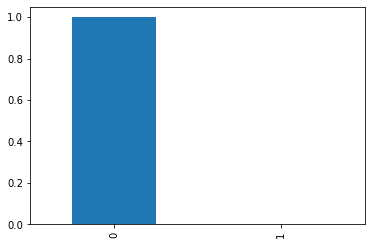

In [26]:
import matplotlib.pyplot as plt

distribution = fraud['isFraud'].value_counts()/fraud.shape[0]
distribution.plot(kind = 'bar')
print(distribution)

In [4]:
fraud.describe

<bound method NDFrame.describe of          step      type     amount     nameOrig  oldbalanceOrg  \
6098545   522  CASH_OUT   66958.56    C41940386      192854.62   
5332549   374   PAYMENT    2753.55   C952023437           0.00   
1342720   137   PAYMENT   14513.45   C817599347       23849.00   
854442     41   PAYMENT    1561.55  C1989432016      257524.00   
2393912   201  CASH_OUT  121816.67   C621629795       20749.00   
...       ...       ...        ...          ...            ...   
2994234   232  CASH_OUT  202503.86  C1513628393           0.00   
51720       9  CASH_OUT  492523.24  C1986491285      205071.00   
5566295   393   PAYMENT   29931.41  C1274936872       18235.57   
5003321   353  CASH_OUT   80124.05   C158348920           0.00   
5791149   401   CASH_IN  378964.17  C1707391113       11614.00   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
6098545       125896.06  C2022699695       179660.87       246619.43        0   
5332549    

In [5]:
fraud.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [7]:
fraud.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [20]:
# Your code here
len(fraud['type'].unique())

5

In [15]:
len(fraud['nameDest'].unique())

92976

In [14]:
len(fraud['nameOrig'].unique())

99996

In [39]:
# since there are only three columnes with type of object. Type has 5 values, while nameOrig and nameDest have more than 90000 values. 
# Therefore, keep only type as
fraud.drop(labels=['nameDest', 'nameOrig'], axis=1, inplace=True)

In [40]:
fraud = pd.concat([fraud, pd.get_dummies(fraud['type'])], axis=1)
fraud.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
4000893,298,CASH_OUT,238490.09,9983.0,0.00,318377.61,556867.70,0,0,0,1,0,0,0
4155159,303,CASH_IN,12704.12,15625.0,28329.12,200437.48,187733.36,0,0,1,0,0,0,0
5206102,370,CASH_IN,408296.16,947.0,409243.16,153733.87,0.00,0,0,1,0,0,0,0
3580555,261,CASH_OUT,257917.75,0.0,0.00,828895.62,1086813.37,0,0,0,1,0,0,0
4908346,349,CASH_OUT,332338.64,11679.0,0.00,53235.43,385574.08,0,0,0,1,0,0,0


In [41]:
fraud.drop(labels=['type'], axis=1, inplace=True)

In [ ]:
# I can do the cleaning but I did not understand the question....

### Run a logisitc regression classifier and evaluate its accuracy.

In [42]:
# Your code here
from sklearn.model_selection import train_test_split

X = fraud.drop(labels='isFraud', axis=1)
y = fraud['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(X_train, y_train)
accuracy = LR.score(X_test, y_test)

print(accuracy)

0.9981


### Now pick a model of your choice and evaluate its accuracy.

In [48]:
# Your code here
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 10)
model.fit(X_train, y_train)
print("test data accuracy was ",model.score(X_test,y_test))

test data accuracy was  0.9994


In [49]:
max_depth = range(1,30)
test = []
train = []

for depth in max_depth:
  model = DecisionTreeClassifier(max_depth= depth)
  model.fit(X_train, y_train)
  test.append(model.score(X_test,y_test))
  train.append(model.score(X_train,y_train))

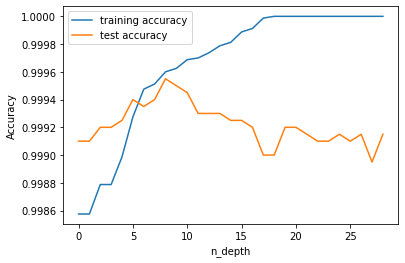

In [50]:
plt.plot( train, label="training accuracy")
plt.plot( test, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_depth")
plt.legend()

In [51]:
model = DecisionTreeClassifier(max_depth = 9)
model.fit(X_train, y_train)
print("test data accuracy was ",model.score(X_test,y_test))

test data accuracy was  0.9995


### Which model worked better and how do you know?

In [2]:
# Your response here
# Decisiontree model seemed to be better since the accuracy was higher. And the max_depth at 9 has the highest the accuracy.

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.